In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from embedding_functions import *
from experiment_setup import *
from functions_for_bootstrap import *
import numba as nb
from scipy.stats import wasserstein_distance
from tqdm import tqdm
import random

In [2]:
# Code up a mixed membership model 
random.seed(222)
np.random.seed(222)

K=3
n= 300
d=3

# use our new function to make a MMSBM 
# 1May24 I added return B to the function, so I can add to the paper what B is for our example
A, largest_prob, P, B = make_MMSBM(n, K)

A = A.astype(float)
ya = UASE([A], d)
# plot_embedding(ya, n, 1, largest_prob)

print(B) # seed keeps this B same everytime

[[0.3 0.2 0.2]
 [0.2 0.6 0.2]
 [0.2 0.2 0.9]]


### Use the test with samples drawn from the same distribution - compared to one bootstrap from itself each time

In [3]:
random.seed(222)
np.random.seed(222)

# make all the pi vectors (n of them)
pi_list = []
largest_prob = []
for i in range(n):
    # pi is a random probability vector of length K
    pi = np.random.dirichlet(np.ones(K)).reshape((K, 1))
    pi_list.append(pi)
    largest_prob.append(np.argmax(pi))

In [66]:
# Generate more samples from the same model with the same B matrix and pi vectors
random.seed(100)

M=300
A_true_draws = []

for m in range(M):
    # use the B matrix from before, B, and the pi vectors, pi_list
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            z_ij = np.random.multinomial(1, pi_list[i].flatten())#.tolist())
            z_ji = np.random.multinomial(1, pi_list[j].flatten())#.tolist())

            P[i,j] = z_ij @ B @ z_ji.T

    A = (np.random.uniform(0, 1, n**2).reshape(n, n) < P)

    A = A.astype(float)

    # make symmetric by setting the lower triangle equal to the upper triangle
    A = np.triu(A) + np.triu(A).T - np.diag(A.diagonal())

    A_true_draws.append(A)

#### ASE-kNN k=5

In [104]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=5

p_vals_k5 = []
A_boots_list_k5 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k5.append(p_val)
    A_boots_list_k5.append(A_boots)

In [ ]:
p_hat_list = p_vals_k5
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes, k={k}")
plt.gca().set_aspect('equal', adjustable='box')

# set ticks bigger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"MMSBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")

plt.show()

compute_roc_and_areas(p_vals_k5, significance_level=0.05)

#### ASE-kNN k=25

In [107]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=25

p_vals_k25 = []
A_boots_list_k25 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k25.append(p_val)
    A_boots_list_k25.append(A_boots)

In [ ]:
p_hat_list = p_vals_k25
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes, k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"MMSBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")

plt.show()

compute_roc_and_areas(p_vals_k25, significance_level=0.05)

#### ASE-kNN k=55

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=55

p_vals_k55 = []
A_boots_list_k55 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k55.append(p_val)
    A_boots_list_k55.append(A_boots)

In [ ]:
p_hat_list = p_vals_k55
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes, k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"MMSBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")
plt.show()

compute_roc_and_areas(p_vals_k55, significance_level=0.05)

#### ASE-kNN k=90

In [72]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

k=90

p_vals_k90 = []
A_boots_list_k90 = []

for m in A_true_draws:
    p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
    p_vals_k90.append(p_val)
    A_boots_list_k90.append(A_boots)

In [ ]:
p_hat_list = p_vals_k90
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes, k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"MMSBM_knnBootstrap_k{k}_M{M}_SYMM.png", facecolor="white")
plt.show()

compute_roc_and_areas(p_vals_k90, significance_level=0.05)

#### ASE-$YY^T$

In [74]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_YYT = []
A_boots_list_YYT = []

for m in A_true_draws:
    p_val, A_boots = create_single_YYT_bootstrap_cropPto0_1range(m,d=d,Q=1000)
    p_vals_YYT.append(p_val)
    A_boots_list_YYT.append(A_boots)

/home/uj21900/Documents/ResamplingAdjacencyMatrices/functions_for_bootstrap.py:193: UserWarning: P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.
  warnings.warn("P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.")


In [ ]:
p_hat_list = p_vals_YYT
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes, $YY^T$")
plt.gca().set_aspect('equal', adjustable='box')

# plt.savefig(f"figs/MMSBM_YYTbootstrap_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_YYT, significance_level=0.05)

#### ASE-Sample edgelist with replacement bootstrap for each draw from the model

This is essentially just dropping some edges, as any edge selected more than once is set to a 1 as this is a binary setting

In [78]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_ESWR = []
A_boots_list = []

Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    A_boots = edgelist_sample_with_replacement(m) 
    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_ESWR.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_ESWR
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n edgelist sample with replacement")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_edgelistSampleRepBootstrap_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_ESWR, significance_level=0.05)

#### ASE-edgelist sample with replacement then rand sample edges

In [83]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_ESWR_plusRand = []
A_boots_list = []

Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    A_boots = edgelist_sample_with_replacement_addRandomEdges(m) 
    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_ESWR_plusRand.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_ESWR_plusRand
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n edgelist sample with replacement \n and random edges added")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_edgelistSampleRepBootstrap_edgesAdded_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_ESWR_plusRand, significance_level=0.05)

### ProNE-kNN d=3

#### ProNE-kNN with k=5

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k5_d3 = []
A_boots_list = []

k=5
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k5_d3.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k5_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k5_d3, significance_level=0.05)

#### ProNE-kNN k=25

In [81]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k25_d3 = []
A_boots_list = []

k=25
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k25_d3.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k25_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k25_d3, significance_level=0.05)

#### ProNE-kNN with k=55

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k55_d3 = []
A_boots_list = []

k=25
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k55_d3.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k55_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k55_d3, significance_level=0.05)

#### ProNE-kNN k=90

In [85]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k90_d3 = []
A_boots_list = []

k=90
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k90_d3.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k90_d3
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k90_d3, significance_level=0.05)

### ProNE-kNN with d=2

In [ ]:
d=2
# FOR KNN PRONE ONLY

#### ProNE-kNN k=5

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k5 = []
A_boots_list = []

k=5
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k5.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k5
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k5, significance_level=0.05)

#### ProNE-kNN k=25

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k25 = []
A_boots_list = []

k=25
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k25.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k25
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k25, significance_level=0.05)

#### ProNE-kNN k=55

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k55 = []
A_boots_list = []

k=55
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k55.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k55
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k55, significance_level=0.05)

#### ProNE-kNN k=90

In [ ]:
# for each of the true draws from the model, create a bootstrap and perform a test with Q permutations
random.seed(100)
np.random.seed(100)

p_vals_prone_k90 = []
A_boots_list = []

k=90
Q=1000 # number of sims to do in the paired exch test

for m in A_true_draws:
    _, A_boots = create_single_kNN_prone_bootstrap(m, d=d, Q=Q, n_neighbors=k) 

    # embed the observed and bootstrapped matrix together
    yhat_est = UASE([m, A_boots], d=d)
    # do a test between the obs and the bootstrap, get a p-value ---------------------------------
    p_val = test_temporal_displacement_two_times(yhat_est, n=m.shape[0], n_sim=Q) 

    p_vals_prone_k90.append(p_val)
    A_boots_list.append(A_boots[0])

In [ ]:
p_hat_list = p_vals_prone_k90
roc = []
alphas = []
for alpha in np.linspace(0, 1, 100):
    alphas.append(alpha)
    num_below_alpha = sum(p_hat_list < alpha)
    roc_point = num_below_alpha / len(p_hat_list)
    roc.append(roc_point)

# Get the power at the 5% significance level
power_significance = 0.05
power_idx = alphas.index(min(alphas, key=lambda x: abs(x - power_significance)))
power = roc[power_idx]


plt.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), linestyle="--", c="grey")
_ = plt.plot(alphas, roc, color='#228B22')

# Set title and aspect ratio
plt.title(f"ROC Curve for 3 Community \n MMSBM with n={n} nodes,\n knn-Prone with k={k}")
plt.gca().set_aspect('equal', adjustable='box')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig(f"figs/MMSBM_knnProneResample_k{k}_M{M}_SYMM_d{d}.png")
plt.show()

compute_roc_and_areas(p_vals_prone_k90, significance_level=0.05)

#### all on one plot

In [ ]:
p_list_allnames = [p_vals_k5, p_vals_k25,p_vals_k55, p_vals_k90, 
                   p_vals_YYT, p_vals_ESWR, 
                   p_vals_prone_k5, p_vals_prone_k25, p_vals_prone_k55, p_vals_prone_k90,
                   p_vals_prone_k5_d3, p_vals_prone_k25_d3,p_vals_prone_k55_d3, p_vals_prone_k90_d3] #p_vals_ESWR_plusRand

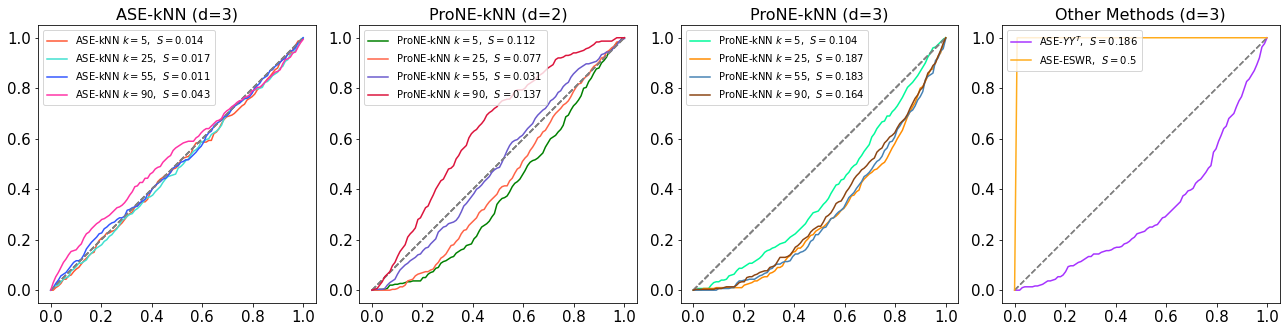

In [ ]:
colors = ['#FF5733', '#40E0D0', '#3357FF', '#FF33A6', '#A633FF', '#FFAC1C', 'g', '#FF6347', '#6A5ACD', '#DC143C', '#00FA9A', '#FF8C00', '#4682B4', '#8B4513']  
labels = ['ASE-kNN $k=5$', 'ASE-kNN $k=25$', 'ASE-kNN $k=55$', 'ASE-kNN $k=90$', 'ASE-$YY^T$', 'ASE-ESWR', 'ProNE-kNN $k=5$', 'ProNE-kNN $k=25$','ProNE-kNN $k=55$', 'ProNE-kNN $k=90$', 
          'ProNE-kNN $k=5$', 'ProNE-kNN $k=25$', 'ProNE-kNN $k=55$','ProNE-kNN $k=90$']

fig, axs = plt.subplots(1, 4, figsize=(18,10))

# Define the indices for each panel
ase_knn_indices = [0, 1, 2, 3]
prone_knn_indices = [6, 7, 8, 9]
prone_knn_indices_d3 = [10, 11, 12, 13]
other_indices = [4, 5]

# Plot ASE-kNN
plot_roc(axs[0], ase_knn_indices, "ASE-kNN (d=3)")

# Plot ProNE-kNN
plot_roc(axs[1], prone_knn_indices, "ProNE-kNN (d=2)")

# Plot ProNE-kNN d=3
plot_roc(axs[2], prone_knn_indices_d3, "ProNE-kNN (d=3)")

# Plot other methods
plot_roc(axs[3], other_indices, "Other Methods (d=3)")

plt.tight_layout()
# plt.savefig(f"figs/MMSBM_allMethods_M{M}_SYMM_3plots_different_d.png", facecolor="white", bbox_inches='tight')
plt.show()

## Change n, run each method and record score to then plot

make more Atrue draws

In [4]:
# Generate more samples from the same model with the same B matrix and pi vectors
random.seed(100)

n_list = [50,100,200,300,500,750,1000, 1500, 2000]

M=max(n_list)
A_true_draws = []

for m in range(M):
    # use the B matrix from before, B, and the pi vectors, pi_list
    P = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            z_ij = np.random.multinomial(1, pi_list[i].flatten())#.tolist())
            z_ji = np.random.multinomial(1, pi_list[j].flatten())#.tolist())

            P[i,j] = z_ij @ B @ z_ji.T

    A = (np.random.uniform(0, 1, n**2).reshape(n, n) < P)

    A = A.astype(float)

    # make symmetric by setting the lower triangle equal to the upper triangle
    A = np.triu(A) + np.triu(A).T - np.diag(A.diagonal())

    A_true_draws.append(A)

#### ASE-kNN with k=5, 25, 90

In [5]:
random.seed(100)
np.random.seed(100)

k5list = []
k25list = []
k90list = []

for n in n_list:
    n = n
    
    # knn
    for k in [5,25,90]:
        k = k
        # for each of the true draws from the model, create a bootstrap and perform a test with Q permutations

        p_vals_k = []
        A_boots_list_k = []

        for m in A_true_draws[0:n]:
            p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
            p_vals_k.append(p_val)
            A_boots_list_k.append(A_boots)

        p_hat_list = p_vals_k

        output = compute_roc_and_areas(p_vals_k, significance_level=0.05)
        # print(list(output.items())[2])

        if k == 5:
            k5list.append(list(output.items())[2][1])
        elif k == 25:
            k25list.append(list(output.items())[2][1])
        elif k == 90:
            k90list.append(list(output.items())[2][1])
        else:
            print("error")

#### ASE-$XX^T$

In [6]:
random.seed(100)
np.random.seed(100)

XXTlist = []

for n in n_list:
    n = n

    p_vals_XXT = []
    A_boots_list_XXT = []


    for m in A_true_draws[0:n]:
        p_val, A_boots = create_single_XXT_bootstrap_cropPto0_1range(m,d=d,Q=1000)
        p_vals_XXT.append(p_val)
        A_boots_list_XXT.append(A_boots)

    p_hat_list = p_vals_XXT

    output = compute_roc_and_areas(p_vals_XXT, significance_level=0.05)
    # print(list(output.items())[2])

    XXTlist.append(list(output.items())[2][1])

/home/uj21900/Documents/ValidBootstrapsForNetworks/functions_for_bootstrap.py:233: UserWarning: P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.
  warnings.warn("P_hat contains values outside of [0,1]. The values outside this range will be clipped to lie in the range.")


#### ProNE-kNN with k=5, 25, 90

In [7]:
random.seed(100)
np.random.seed(100)

k5pronelist = []
k25pronelist = []
k90pronelist = []

for n in n_list:
    n = n
    
    # knn
    for k in [5,25,90]:
        k = k
        # for each of the true draws from the model, create a bootstrap and perform a test with Q permutations

        p_vals_k = []
        A_boots_list_k = []

        for m in A_true_draws[0:n]:
            p_val, A_boots = create_single_kNN_bootstrap(m, d=d, Q=1000, n_neighbors=k)
            p_vals_k.append(p_val)
            A_boots_list_k.append(A_boots)

        p_hat_list = p_vals_k

        output = compute_roc_and_areas(p_vals_k, significance_level=0.05)
        # print(list(output.items())[2])

        if k == 5:
            k5pronelist.append(list(output.items())[2][1])
        elif k == 25:
            k25pronelist.append(list(output.items())[2][1])
        elif k == 90:
            k90pronelist.append(list(output.items())[2][1])
        else:
            print("error")

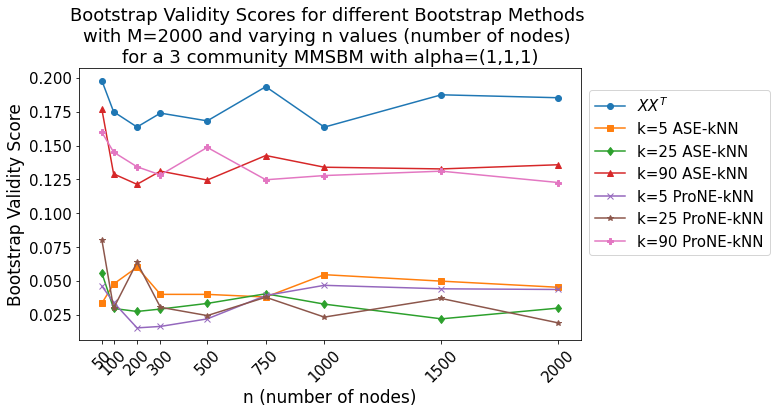

In [9]:
plt.figure(figsize=(9,5))

# Plot the lists
plt.plot(n_list, XXTlist, label="$ASE-XX^T$", marker='o')
plt.plot(n_list, k5list, label="k=5 ASE-kNN", marker='s')
plt.plot(n_list, k25list, label="k=25 ASE-kNN", marker='d')
plt.plot(n_list, k90list, label="k=90 ASE-kNN", marker='^')
plt.plot(n_list, k5pronelist, label="k=5 ProNE-kNN", marker='x')
plt.plot(n_list, k25pronelist, label="k=25 ProNE-kNN", marker='*')
plt.plot(n_list, k90pronelist, label="k=90 ProNE-kNN", marker='P')

# Add labels and title
plt.xlabel("n (number of nodes)", fontsize=17)
plt.ylabel("Bootstrap Validity Score", fontsize=17)
plt.title(f"Bootstrap Validity Scores for different Bootstrap Methods \nwith M={M} and varying n values (number of nodes) \nfor a 3 community MMSBM with alpha=(1,1,1)", fontsize=18)

# add xticks for the n_list
plt.xticks(n_list)
# rotate the xticks
plt.xticks(rotation=45)

# increase the font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.legend(loc="upper right", bbox_to_anchor=(1.39, 0.95), fontsize=15)

plt.savefig(f"MMSBM_scores_varying_n_M{M}_SYMM.png", bbox_inches='tight', facecolor="white")

plt.show()